In [ ]:

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import joblib

# Misc
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load dataset
df = pd.read_csv("concatenated_dataset_Aug_2021_to_July_2024.csv")

print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print("Columns:", list(df.columns))

# Basic overview
display(df.head())
display(df.describe())
display(df.info())


✅ Dataset Loaded Successfully
Shape: (123134, 18)
Columns: ['datetime', 'main_aqi', 'components_co', 'components_no', 'components_no2', 'components_o3', 'components_so2', 'components_pm2_5', 'components_pm10', 'components_nh3', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'surface_pressure', 'wind_speed_10m', 'wind_direction_10m', 'shortwave_radiation']


,datetime,main_aqi,components_co,components_no,components_no2,components_o3,components_so2,components_pm2_5,components_pm10,components_nh3,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,surface_pressure,wind_speed_10m,wind_direction_10m,shortwave_radiation
0,8/24/2021 0:00,5,1014.71,0.00,17.14,35.76,6.44,59.59,66.81,5.95,28.1,80.0,24.3,0.0,976.6,6.2,170.0,0
1,8/24/2021 1:00,5,1054.76,0.01,19.36,32.19,6.68,66.96,74.88,6.08,27.8,83.0,24.7,0.0,976.4,6.5,180.0,0
2,8/24/2021 2:00,5,1295.09,1.40,30.16,22.89,8.70,79.88,89.90,7.73,27.4,87.0,25.0,0.0,976.2,5.4,180.0,0
3,8/24/2021 3:00,5,1682.28,9.16,41.13,28.25,12.99,98.91,111.25,9.75,27.1,89.0,25.2,0.0,976.2,5.8,184.0,0
4,8/24/2021 4:00,5,1321.79,4.81,32.56,91.55,27.90,89.59,97.95,7.28,26.9,91.0,25.2,0.0,976.1,6.1,183.0,0


,main_aqi,components_co,components_no,components_no2,components_o3,components_so2,components_pm2_5,components_pm10,components_nh3,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,surface_pressure,wind_speed_10m,wind_direction_10m,shortwave_radiation
count,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000,123134.000000
mean,4.059374,1795.779186,17.487492,38.677333,69.500984,11.543064,101.025242,142.489734,20.673209,21.509873,55.030613,10.147376,0.078733,931.829852,6.305674,192.417087,215.173932
std,1.084070,2400.419802,48.158736,50.447881,58.730428,14.398262,137.878193,162.322729,26.607303,8.697229,24.177340,9.889519,0.612637,64.218361,3.857236,105.132595,291.387531
min,1.000000,150.200000,0.000000,0.340000,0.000000,0.160000,0.500000,0.570000,0.000000,-9.035500,2.219685,-27.835500,0.000000,825.692140,0.000000,1.000000,0.000000
25%,3.000000,453.950000,0.000000,6.940000,27.890000,2.530000,25.830000,50.460000,4.560000,14.900000,35.983740,3.257000,0.000000,876.401000,3.600000,90.000000,0.000000
50%,4.000000,867.840000,0.420000,18.160000,60.800000,6.140000,51.115000,88.755000,12.160000,22.500000,56.646564,10.107000,0.000000,950.500000,5.503471,204.000000,9.000000
75%,5.000000,1949.310000,5.700000,50.720000,101.570000,14.780000,111.240000,162.960000,26.090000,28.300000,75.166219,18.557000,0.000000,989.400000,8.300000,285.000000,428.000000
max,5.000000,27771.000000,686.650000,833.510000,709.530000,156.400000,1965.050000,2183.340000,389.100000,46.200000,100.000000,28.700000,81.000000,1023.500000,46.700000,360.000000,1066.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123134 entries, 0 to 123133
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   datetime              123134 non-null  object 
 1   main_aqi              123134 non-null  int64  
 2   components_co         123134 non-null  float64
 3   components_no         123134 non-null  float64
 4   components_no2        123134 non-null  float64
 5   components_o3         123134 non-null  float64
 6   components_so2        123134 non-null  float64
 7   components_pm2_5      123134 non-null  float64
 8   components_pm10       123134 non-null  float64
 9   components_nh3        123134 non-null  float64
 10  temperature_2m        123134 non-null  float64
 11  relative_humidity_2m  123134 non-null  float64
 12  dew_point_2m          123134 non-null  float64
 13  precipitation         123134 non-null  float64
 14  surface_pressure      123134 non-null  float64
 15  

None

Missing values per column:
datetime                0
main_aqi                0
components_co           0
components_no           0
components_no2          0
components_o3           0
components_so2          0
components_pm2_5        0
components_pm10         0
components_nh3          0
temperature_2m          0
relative_humidity_2m    0
dew_point_2m            0
precipitation           0
surface_pressure        0
wind_speed_10m          0
wind_direction_10m      0
shortwave_radiation     0
dtype: int64


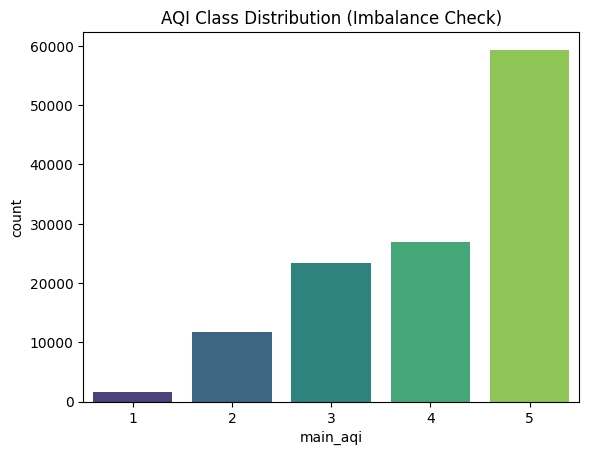

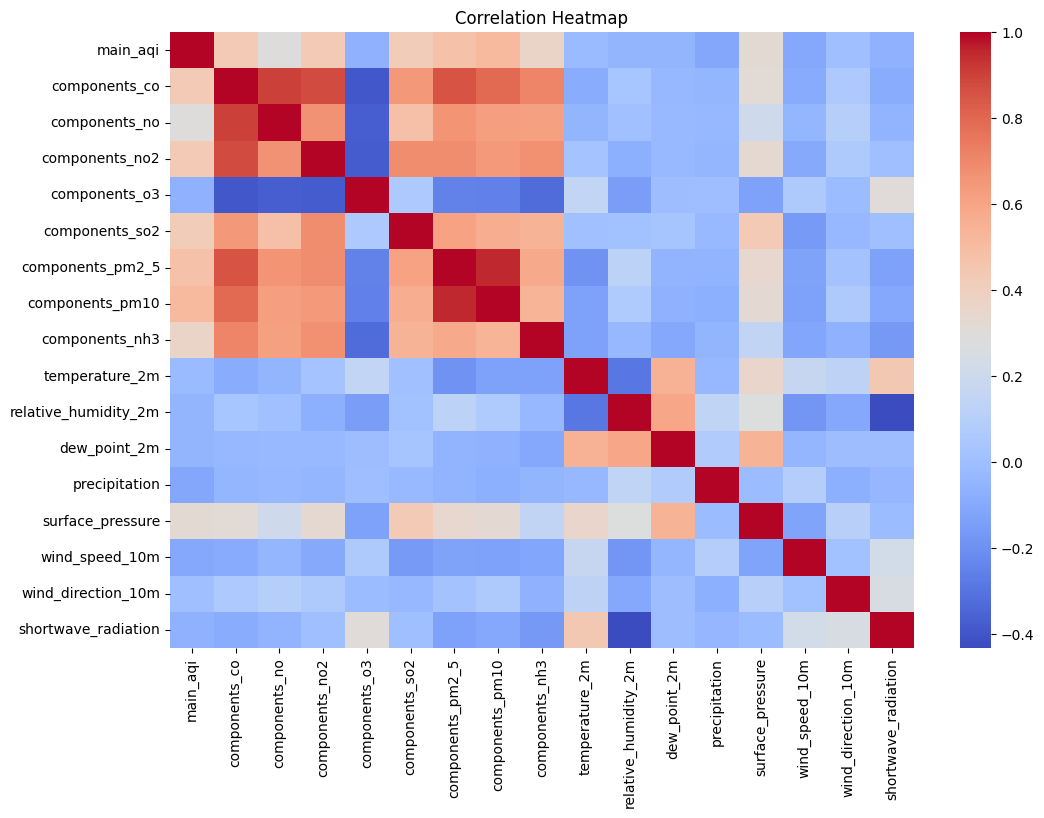

In [ ]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Target distribution
sns.countplot(x='main_aqi', data=df, palette='viridis')
plt.title("AQI Class Distribution (Imbalance Check)")
plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Drop unnecessary columns
df = df.dropna(subset=['main_aqi'])
df = df.drop(['datetime'], axis=1, errors='ignore')

# Check duplicates
duplicates = df.duplicated().sum()
print(f"Removed {duplicates} duplicate rows.") if duplicates > 0 else print("No duplicates found.")

# Separate features and target
X = df.drop(['main_aqi'], axis=1)
y = df['main_aqi']

# Fill any missing numerical values with median
X = X.fillna(X.median())

# Scale features for LightGBM stability
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


No duplicates found.


In [ ]:
# Stratified split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (86193, 16), Val: (18470, 16), Test: (18471, 16)


In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("✅ Before SMOTE:", y_train.value_counts().to_dict())
print("✅ After SMOTE:", y_train_bal.value_counts().to_dict())


✅ Before SMOTE: {5: 41555, 4: 18821, 3: 16379, 2: 8256, 1: 1182}
✅ After SMOTE: {5: 41555, 4: 41555, 3: 41555, 2: 41555, 1: 41555}


In [ ]:
from lightgbm import early_stopping, log_evaluation

# Train LightGBM with callbacks instead of early_stopping_rounds
lgb_model.fit(
    X_train_bal, y_train_bal,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[
        early_stopping(stopping_rounds=20),
        log_evaluation(10)
    ]
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 207775, number of used features: 16
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.844448
[20]	valid_0's multi_logloss: 0.569972
[30]	valid_0's multi_logloss: 0.441681
[40]	valid_0's multi_logloss: 0.375407
[50]	valid_0's multi_logloss: 0.338183
[60]	valid_0's multi_logloss: 0.314529
[70]	valid_0's multi_logloss: 0.299957
[80]	valid_0's multi_logloss: 0.289678
[90]	valid_0's multi_logloss: 0.281367
[100]	valid_0's multi_loglos

LGBMClassifier(colsample_bytree=0.85, learning_rate=0.05, max_depth=8,
               n_estimators=700, num_class=5, objective='multiclass',
               random_state=42, subsample=0.85)

✅ Validation Accuracy: 0.9099

📊 Classification Report:
              precision    recall  f1-score   support

           1     0.9529    0.9605    0.9567       253
           2     0.9285    0.9536    0.9409      1769
           3     0.8561    0.8812    0.8685      3510
           4     0.8011    0.8507    0.8252      4033
           5     0.9824    0.9379    0.9596      8905

    accuracy                         0.9099     18470
   macro avg     0.9042    0.9168    0.9102     18470
weighted avg     0.9132    0.9099    0.9111     18470



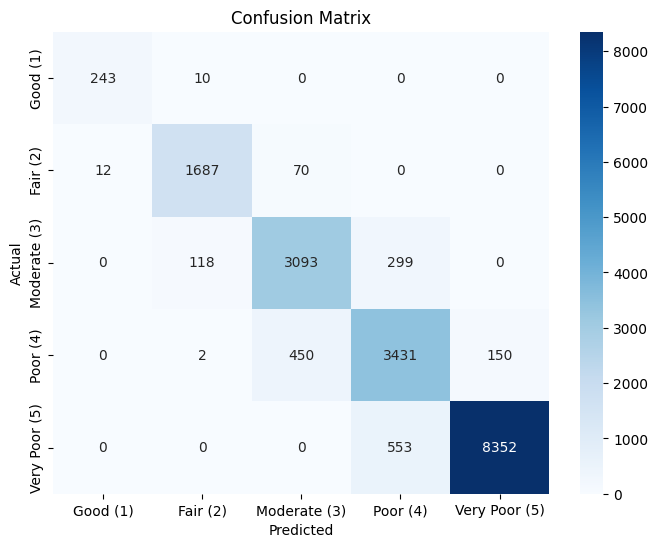

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation data
y_pred = lgb_model.predict(X_val)

# Accuracy
acc = accuracy_score(y_val, y_pred)
print(f"✅ Validation Accuracy: {acc:.4f}\n")

# Detailed classification report
print("📊 Classification Report:")
print(classification_report(y_val, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'],
            yticklabels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


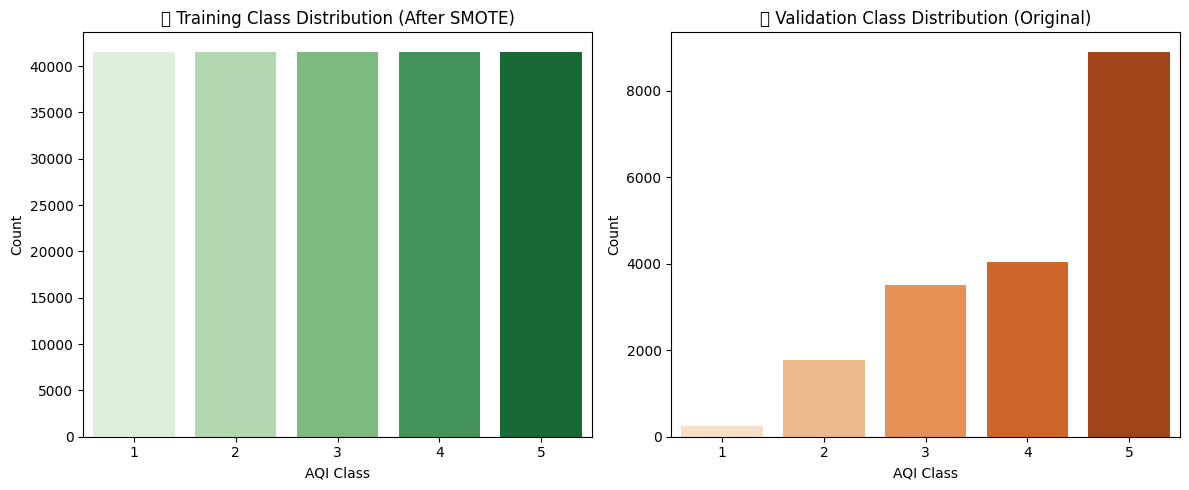

📊 Class-wise Reliability Metrics:


,AQI_Class,Precision,Recall,F1-Score
0,Good (1),0.9529,0.9605,0.9567
1,Fair (2),0.9285,0.9536,0.9409
2,Moderate (3),0.8561,0.8812,0.8685
3,Poor (4),0.8011,0.8507,0.8252
4,Very Poor (5),0.9824,0.9379,0.9596


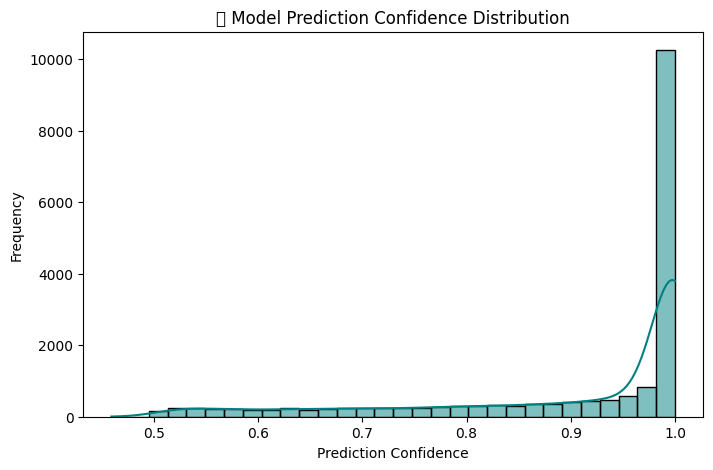

🔹 Average Confidence: 0.9058
🔹 Std. Dev of Confidence: 0.1417


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1️⃣ Class Distribution After Balancing ----
train_class_dist = pd.Series(y_train_bal).value_counts().sort_index()
val_class_dist = pd.Series(y_val).value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=train_class_dist.index, y=train_class_dist.values, ax=ax[0], palette='Greens')
ax[0].set_title('🟢 Training Class Distribution (After SMOTE)')
ax[0].set_xlabel('AQI Class')
ax[0].set_ylabel('Count')

sns.barplot(x=val_class_dist.index, y=val_class_dist.values, ax=ax[1], palette='Oranges')
ax[1].set_title('🟠 Validation Class Distribution (Original)')
ax[1].set_xlabel('AQI Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# ---- 2️⃣ Class-wise Metrics Summary ----
from sklearn.metrics import precision_score, recall_score, f1_score

precisions = precision_score(y_val, y_pred, average=None, labels=[1,2,3,4,5])
recalls = recall_score(y_val, y_pred, average=None, labels=[1,2,3,4,5])
f1s = f1_score(y_val, y_pred, average=None, labels=[1,2,3,4,5])

metrics_df = pd.DataFrame({
    'AQI_Class': ['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'],
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1s
})

print("📊 Class-wise Reliability Metrics:")
display(metrics_df.round(4))

# ---- 3️⃣ Prediction Confidence Distribution ----
if hasattr(lgb_model, "predict_proba"):
    y_proba = lgb_model.predict_proba(X_val)
    max_confidence = np.max(y_proba, axis=1)

    plt.figure(figsize=(8,5))
    sns.histplot(max_confidence, bins=30, kde=True, color='teal')
    plt.title("🔍 Model Prediction Confidence Distribution")
    plt.xlabel("Prediction Confidence")
    plt.ylabel("Frequency")
    plt.show()

    print(f"🔹 Average Confidence: {np.mean(max_confidence):.4f}")
    print(f"🔹 Std. Dev of Confidence: {np.std(max_confidence):.4f}")


In [ ]:
import joblib

# Save model
joblib.dump(lgb_model, "aqi_lightgbm_model.pkl")

print("✅ Model saved as aqi_lightgbm_model.pkl")


✅ Model saved as aqi_lightgbm_model.pkl
